Importing the necessary dependancies  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Loading the dataset

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes 2.csv')

In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Deducing the shape of the dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
metrics = diabetes_dataset.describe().loc[['count', 'mean', 'std', 'min', 'max']]
print(metrics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
max     67.100000                  2.420000   81.000000    1.000000  


Exploring the target column


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 indicates Non-diabetic

1 indicates Diabetic

Feature Analysis using various plots

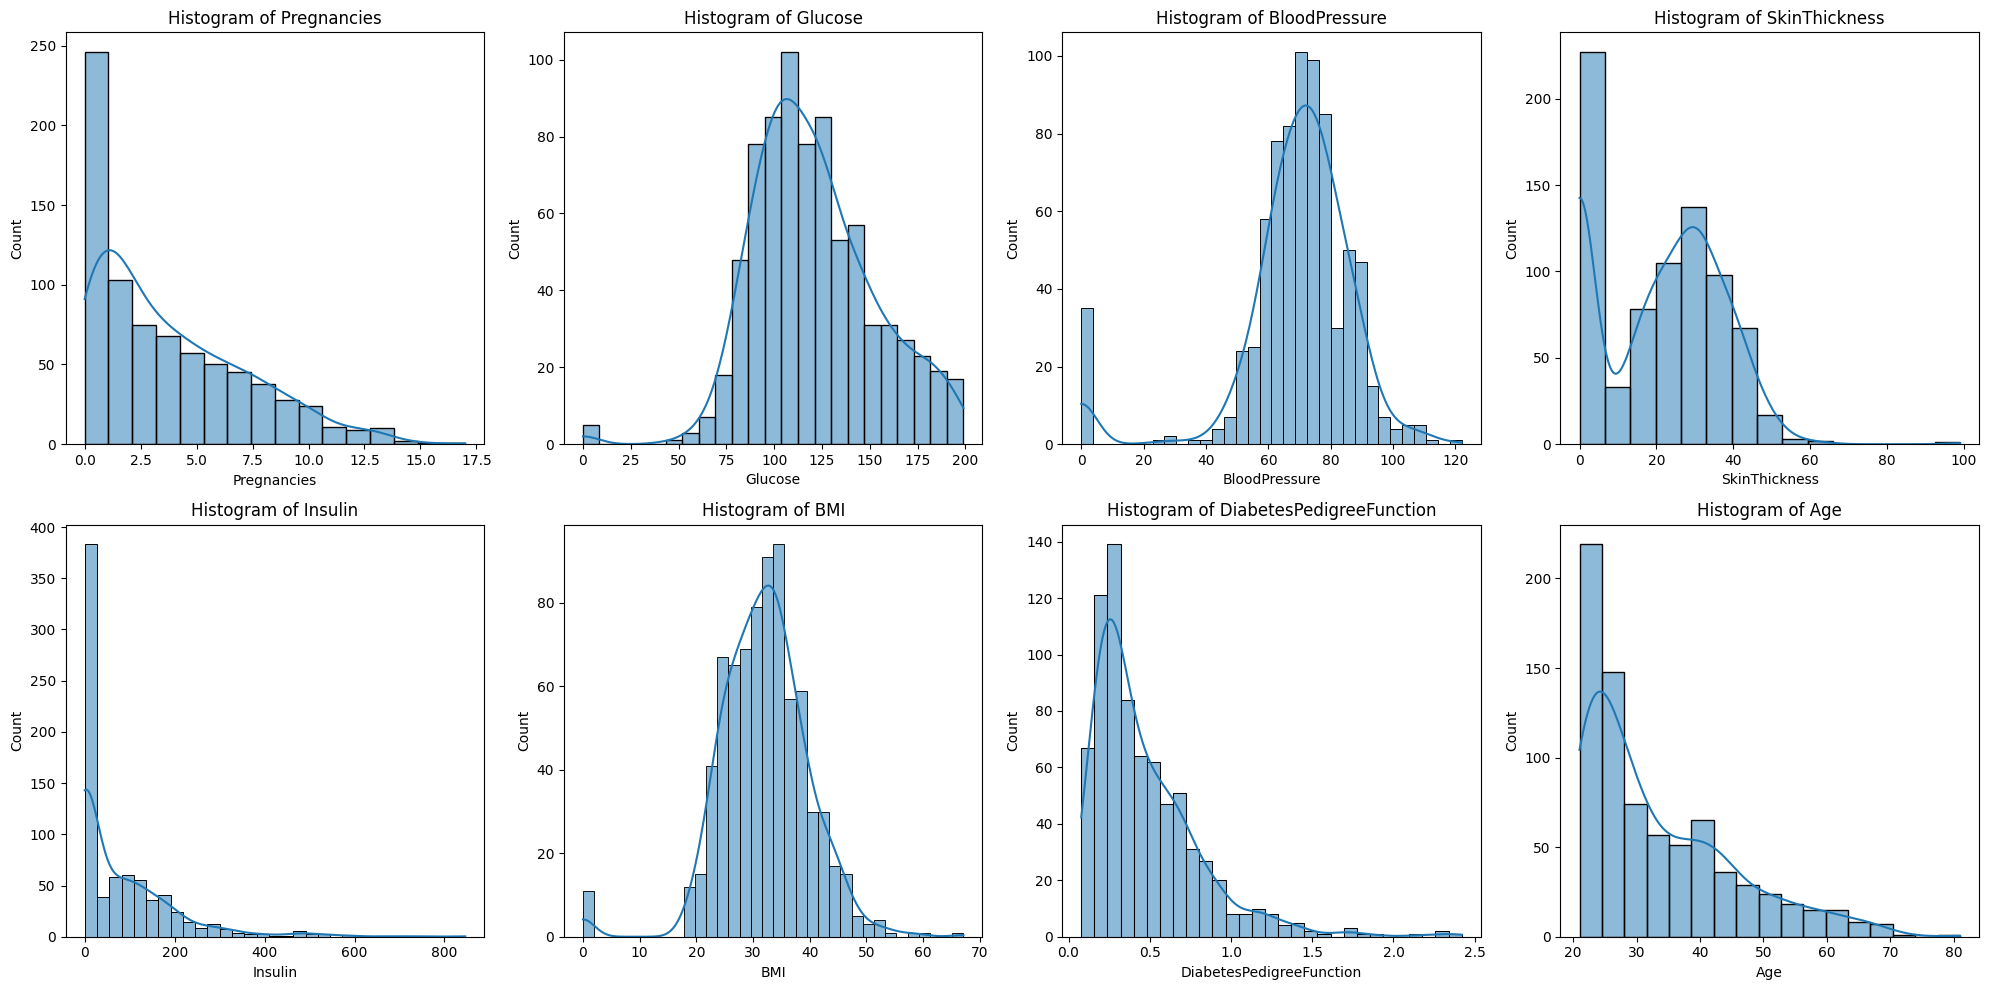

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


plt.figure(figsize=(20, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=diabetes_dataset, x=column, kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


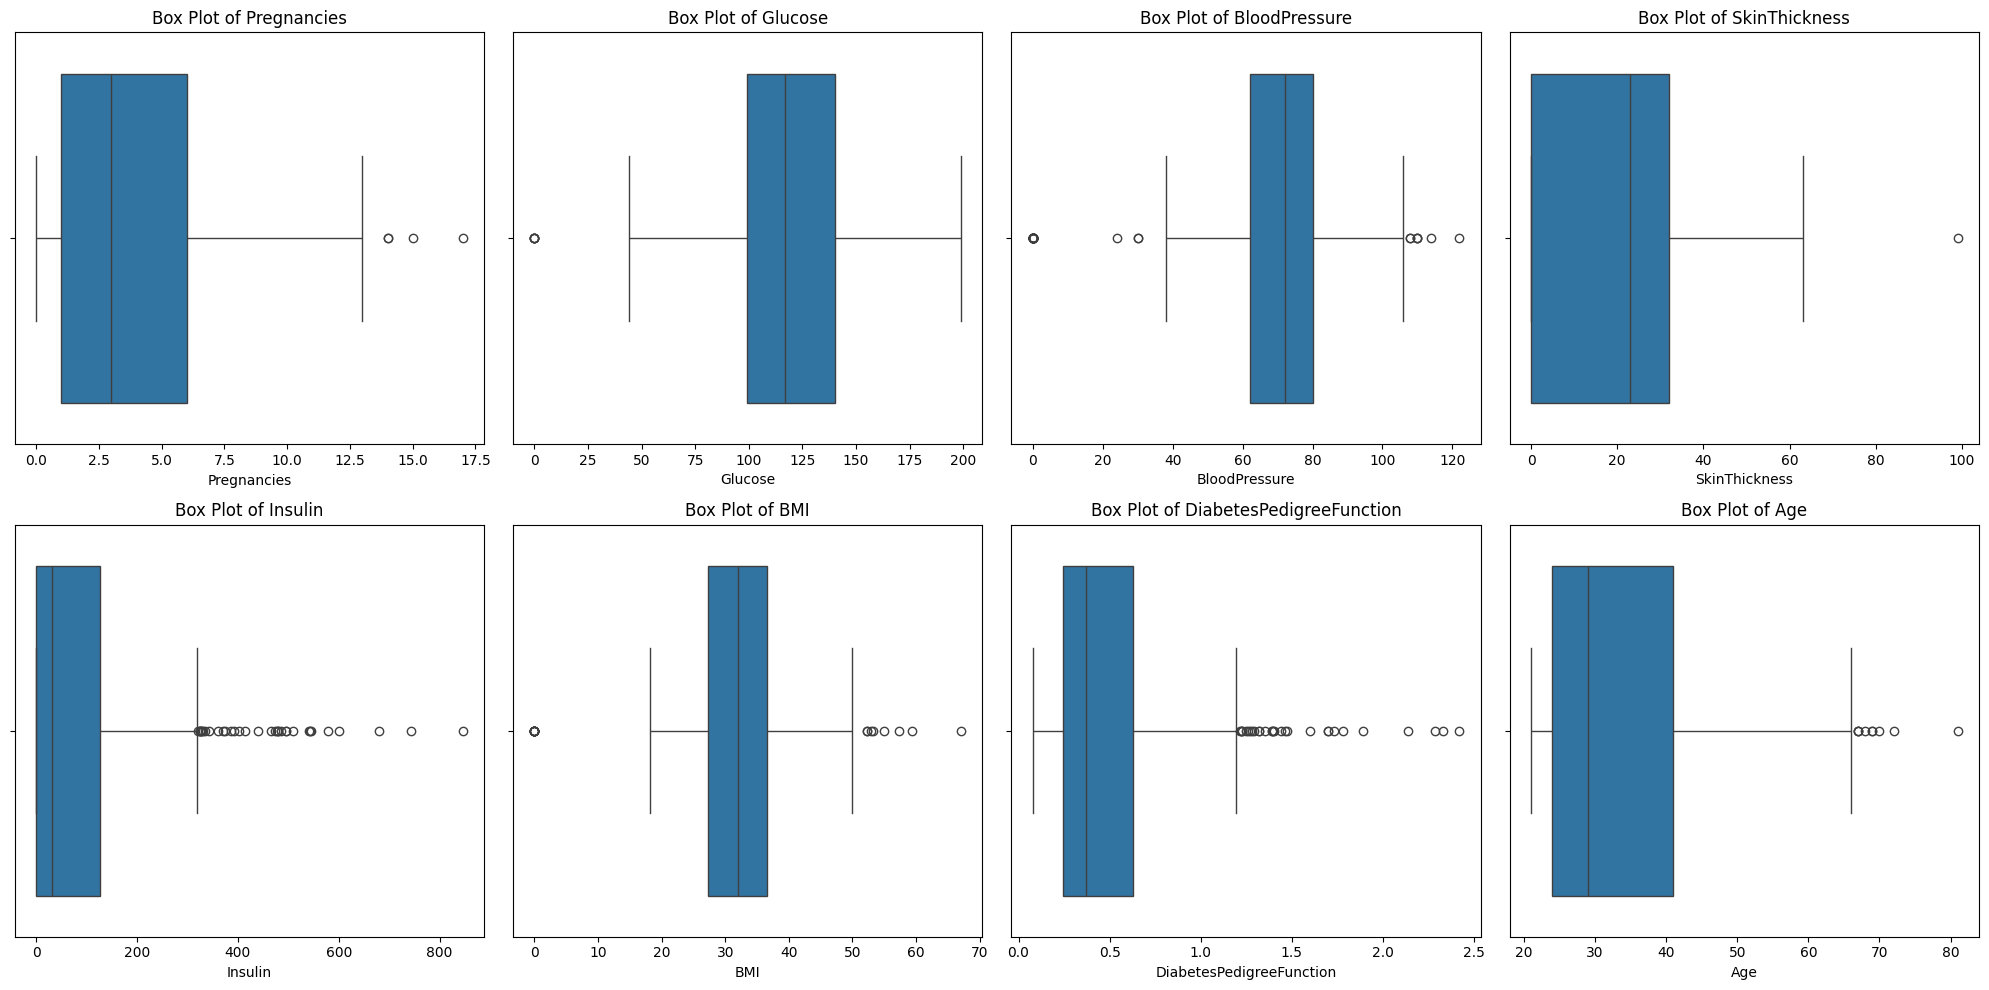

In [ ]:
# Plot box plots for each feature
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=diabetes_dataset, x=column)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


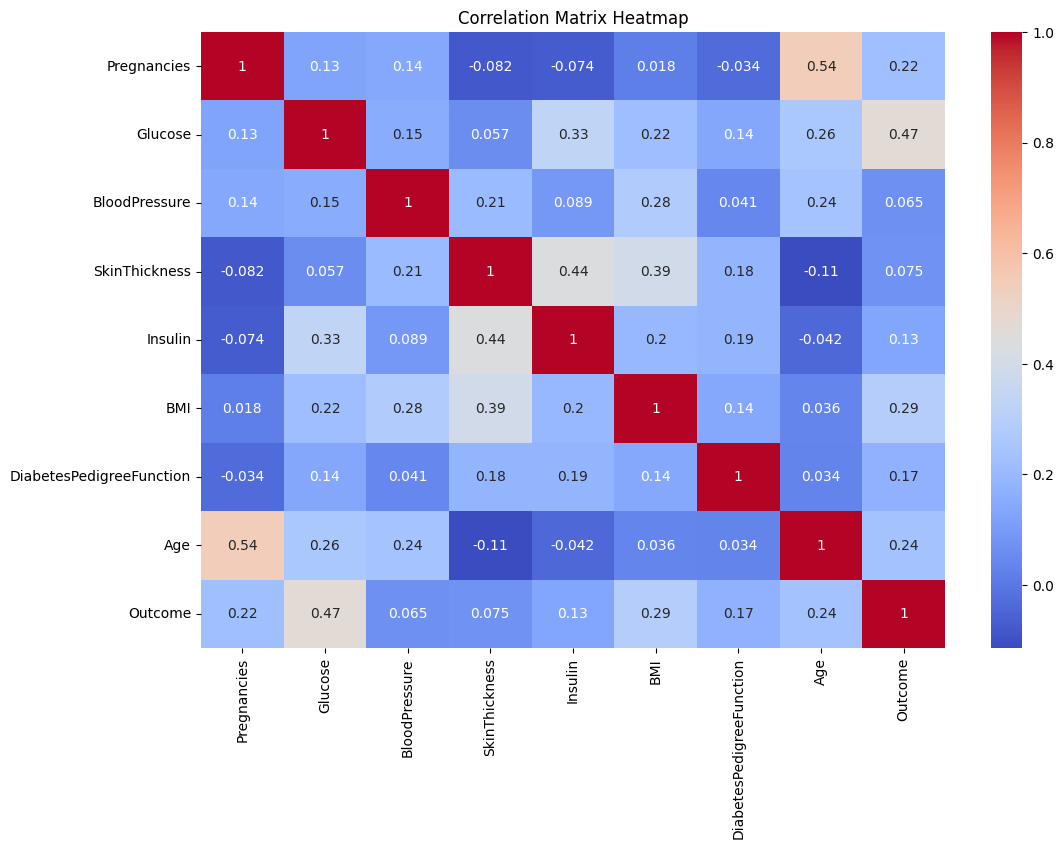

In [ ]:
# Correlation matrix
corr_matrix = diabetes_dataset.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Data Partitioning

In [ ]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# Splitting the dataset into training and testing sets with stratification for balanced class distribution
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (691, 8) (77, 8)


Training the model

Assesing the accuracy scores of various models

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tabulate import tabulate



models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=2),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
}


results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    train_accuracy = accuracy_score(model.predict(X_train), Y_train)
    test_accuracy = accuracy_score(model.predict(X_test), Y_test)
    results.append([name, train_accuracy, test_accuracy])


results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])


table = tabulate(results_df, headers='keys', tablefmt='grid')
print(table)


+----+---------------------+------------------+-----------------+
|    | Model               |   Train Accuracy |   Test Accuracy |
+====+=====================+==================+=================+
|  0 | Logistic Regression |         0.781476 |        0.766234 |
+----+---------------------+------------------+-----------------+
|  1 | SVM (Linear Kernel) |         0.781476 |        0.779221 |
+----+---------------------+------------------+-----------------+
|  2 | Random Forest       |         1        |        0.727273 |
+----+---------------------+------------------+-----------------+
|  3 | k-NN                |         0.798842 |        0.662338 |
+----+---------------------+------------------+-----------------+


Fine tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, Y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'C': 10, 'kernel': 'linear'}


Cross-Validation using the best parameters

In [ ]:
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='linear', C=10)
scores = cross_val_score(svm_model, X, Y, cv=3)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean()}")
print(f"Standard Deviation of Accuracy: {scores.std():.2f}")


Cross-validation scores: [0.7578125 0.734375  0.7890625]
Mean CV accuracy: 0.7604166666666666
Standard Deviation of Accuracy: 0.02


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear', C=10)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(svm_model, X, Y, cv=3)

# Calculate precision, recall, and F1 score
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)

# Print precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.6944
Recall: 0.5597
F1 Score: 0.6198


In [ ]:

from sklearn.metrics import classification_report

# Generate and print the classification report
print("Classification Report:")
print(classification_report(Y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       500
           1       0.69      0.56      0.62       268

    accuracy                           0.76       768
   macro avg       0.74      0.71      0.72       768
weighted avg       0.75      0.76      0.75       768



Considering the accuracy scores, we are using SVM (Linear kernel) for training our model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Analysis of feature importance based on SVM coefficients

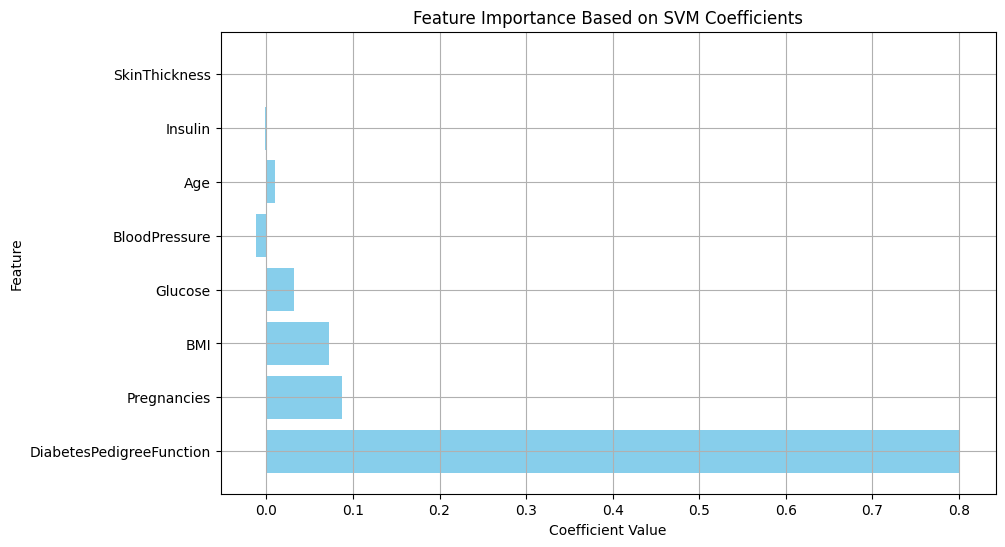

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)


classifier = SVC(kernel='linear', C=10)
classifier.fit(X_train, Y_train)


feature_names = diabetes_dataset.drop(columns='Outcome').columns


coefficients = classifier.coef_.flatten()


coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})


coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on SVM Coefficients')
plt.grid(True)
plt.show()


In [ ]:

input_data = (1,89,66,23,94,28.1,0.167,21) #Only for training. While running the app, we will be taking user inputs


input_data_as_numpy_array = np.asarray(input_data)

# Making it for an instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



classifier = SVC(probability=True, random_state=42)


classifier.fit(X_train, Y_train)


prob = classifier.predict_proba(input_data_reshaped)
h_probab = prob[0][1] * 100

print(f"Probability of being diabetic: {h_probab:.2f}%")




Probability of being diabetic: 7.02%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score



cv_scores = cross_val_score(classifier, X, Y, scoring='accuracy', cv=3)


print("Cross-Validation Accuracy Scores:", cv_scores)


print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [0.73828125 0.74609375 0.765625  ]
Mean Accuracy: 0.75
Standard Deviation of Accuracy: 0.01


Loading the trained model for further use

In [ ]:
import pickle
model_file = 'diabetes_probab_model.sav'
pickle.dump(classifier, open(model_file,'wb'))

In [ ]:
l_model = pickle.load(open('diabetes_probab_model.sav','rb'))

In [ ]:
input_data = (8,99,84,0,0,35.4,0.388,50)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prob = l_model.predict_proba(input_data_reshaped)
h_probab = prob[0][1] * 100

print(f"Probability of being diabetic: {h_probab:.2f}%")

Probability of being diabetic: 19.54%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
